# Deep Learning project - IPSI3

## Training from scratch

Found 600 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,630,634 (6.22 MB)

 Trainable params: 1,630,634 (6.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 260ms/step - accuracy: 0.1240 - loss: 2.3694 - val_accuracy: 0.2800 - val_loss: 2.0497 - learning_rate: 0.0010
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 265ms/step - accuracy: 0.2698 - loss: 1.9812 - val_accuracy: 0.2900 - val_loss: 1.9532 - learning_rate: 0.0010
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 240ms/step - accuracy: 0.3923 - loss: 1.6721 - val_accuracy: 0.4050 - val_loss: 1.7190 - learning_rate: 0.0010
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 241ms/step - accuracy: 0.4620 - loss: 1.4453 - val_accuracy: 0.3650 - val_loss: 1.6048 - learning_rate: 0.0010
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 276ms/step - accuracy: 0.4963 - loss: 1.2802 - val_accuracy: 0.4050 - val_loss: 1.5502 - learning_rate: 0.0010
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 247ms/step - accuracy: 0.5388 - loss: 1.1904 - val_accuracy: 0.4700 - val_loss: 1.5478 - learning_rate: 0.0010
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 288ms/step - accuracy: 0.6008 - loss: 1.

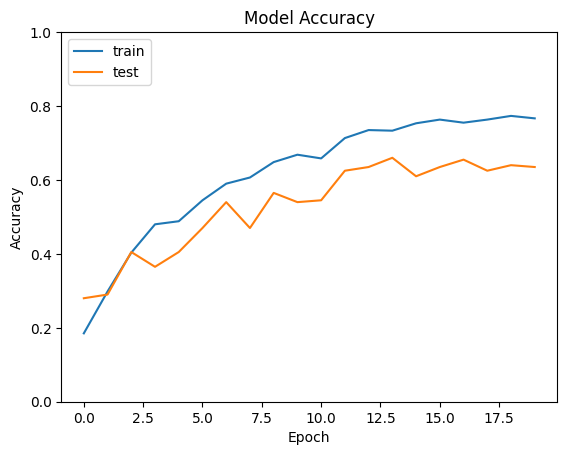

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

# Directories for data
DATA_DIR = 'data/flowers/'
TRAIN_DIR = DATA_DIR + 'train'
TEST_DIR = DATA_DIR + 'test'

# Data Augmentation
datagenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagenerator.flow_from_directory(
    TRAIN_DIR,
    target_size=(128, 128),
    class_mode='categorical',
    batch_size=16,
    shuffle=True,
    color_mode='rgb'
)

test_generator = datagenerator.flow_from_directory(
    TEST_DIR,
    target_size=(128, 128),
    class_mode='categorical',
    color_mode='rgb'
)

# Baseline Model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1),
    EarlyStopping(monitor='val_loss', patience=5, verbose=1)
]

# Initial Summary of the model
model.summary()

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=callbacks
)

# Plot the training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend(['train', 'test'], loc='upper left')

## Training with pre-trained weights

Found 600 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 392ms/step - accuracy: 0.3927 - loss: 1.8385 - val_accuracy: 0.7200 - val_loss: 0.8784 - learning_rate: 0.0010
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 311ms/step - accuracy: 0.8180 - loss: 0.4918 - val_accuracy: 0.7600 - val_loss: 0.7699 - learning_rate: 0.0010
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 337ms/step - accuracy: 0.8548 - loss: 0.4395 - val_accuracy: 0.8050 - val_loss: 0.6514 - learning_rate: 0.0010
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 317ms/step - accuracy: 0.8975 - loss: 0.3484 - val_accuracy: 0.7900 - val_loss: 0.6948 - learning_rate: 0.0010
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.9169 - loss: 0.2713
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 292ms/step - accuracy: 0.9166 - loss: 0.2720 - val_accuracy: 0.7700 - val_loss: 0.7730 - learning_rate: 0.0010
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 288ms/step - accuracy: 0.9290 - loss: 0.21

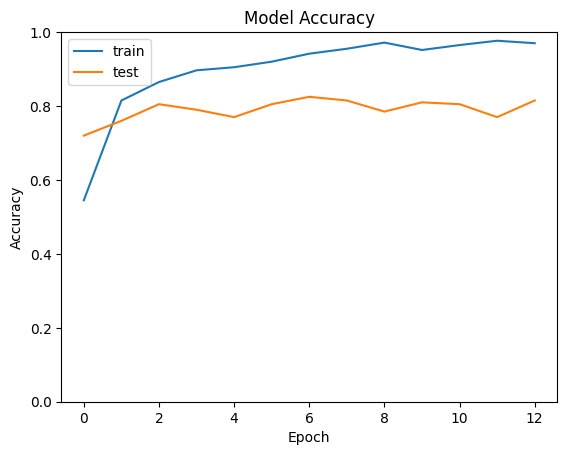

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.applications import mobilenet_v2

# Directories for data
DATA_DIR = 'data/flowers/'
TRAIN_DIR = DATA_DIR + 'train'
TEST_DIR = DATA_DIR + 'test'

# Data Augmentation
datagenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagenerator.flow_from_directory(
    TRAIN_DIR,
    target_size=(128, 128),
    class_mode='categorical',
    batch_size=16,
    shuffle=True,
    color_mode='rgb'
)

test_generator = datagenerator.flow_from_directory(
    TEST_DIR,
    target_size=(128, 128),
    class_mode='categorical',
    color_mode='rgb'
)

# Pretrained Model
# Take all layers except the dense ones (include_top=False)
base_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model
base_model.trainable = False

# Baseline Model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1),
    EarlyStopping(monitor='val_loss', patience=5, verbose=1)
]

# Initial Summary of the model
model.summary()

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=callbacks
)

# Plot the training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend(['train', 'test'], loc='upper left')


# Training with pre-trained weights, fine tuning

Found 600 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 1,206,080 (4.60 MB)

 Non-trainable params: 1,051,904 (4.01 MB)

Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 369ms/step - accuracy: 0.0823 - loss: 2.8811 - val_accuracy: 0.1450 - val_loss: 2.5239 - learning_rate: 1.0000e-05
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 310ms/step - accuracy: 0.1352 - loss: 2.4973 - val_accuracy: 0.1700 - val_loss: 2.4113 - learning_rate: 1.0000e-05
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 306ms/step - accuracy: 0.1678 - loss: 2.3344 - val_accuracy: 0.2300 - val_loss: 2.2473 - learning_rate: 1.0000e-05
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 305ms/step - accuracy: 0.3094 - loss: 2.0028 - val_accuracy: 0.3000 - val_loss: 1.9812 - learning_rate: 1.0000e-05
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 311ms/step - accuracy: 0.3684 - loss: 1.8465 - val_accuracy: 0.3450 - val_loss: 1.8662 - learning_rate: 1.0000e-05
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 310ms/step - accuracy: 0.4741 - loss: 1.6787 - val_accuracy: 0.4350 - val_loss: 1.7223 - learning_rate: 1.0000e-05
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 308ms/step - acc

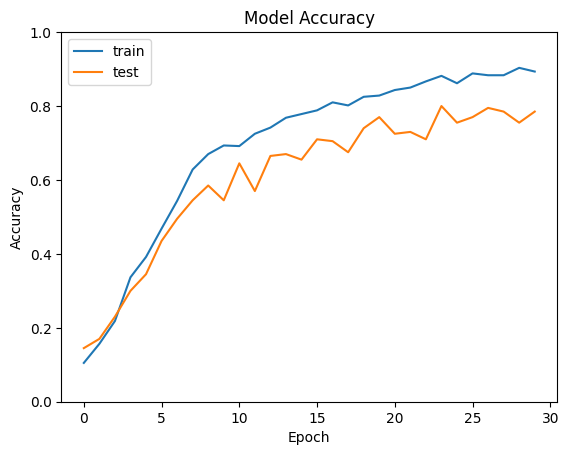

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.applications import mobilenet_v2

# Directories for data
DATA_DIR = 'data/flowers/'
TRAIN_DIR = DATA_DIR + 'train'
TEST_DIR = DATA_DIR + 'test'

# Data Augmentation
datagenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagenerator.flow_from_directory(
    TRAIN_DIR,
    target_size=(128, 128),
    class_mode='categorical',
    batch_size=16,
    shuffle=True,
    color_mode='rgb'
)

test_generator = datagenerator.flow_from_directory(
    TEST_DIR,
    target_size=(128, 128),
    class_mode='categorical',
    color_mode='rgb'
)

# Pretrained Model
# Take all layers except the dense ones (include_top=False)
base_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

base_model.trainable = True
for layer in base_model.layers[:-20]:  # Keep the first layers frozen
    layer.trainable = False

# Baseline Model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1),
    EarlyStopping(monitor='val_loss', patience=5, verbose=1)
]

# Initial Summary of the model
model.summary()

# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    callbacks=callbacks
)

# Plot the training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend(['train', 'test'], loc='upper left')


# Changes made to the base model

- Augment the data with random rotation, zoom, shift, shear, flip, and brightness
- Use a decay on the learning rate
- Use more layers (Conv, pooling and dense)
- Use dropout on dense layer
- Use early stopping just in case
- Use Adam

---
- See if momentum could be useful
- Try batch norm
- Try weight decay

---
- 70% is good with a simple model, so we can try to use a pre-trained model